In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


C:\Program Files (x86)\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Program Files (x86)\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Program Files (x86)\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
ROOT = 'BatDongSan'
PATH_DATA = os.path.join(ROOT, 'chotot.csv')


In [3]:
df = pd.read_csv(PATH_DATA)


In [4]:
[*df.columns]


['id',
 'list_time',
 'type_real_estate',
 'ward',
 'area',
 'region',
 'address',
 'property_status',
 'price_m2',
 'direction',
 'balconydirection',
 'property_legal_document',
 'size',
 'floornumber',
 'apartment_type',
 'furnishing_sell',
 'apartment_feature',
 'rooms',
 'toilets',
 'floors',
 'house_type',
 'living_size',
 'width',
 'length',
 'land_type',
 'property_road_condition',
 'land_feature',
 'property_back_condition',
 'price']

In [5]:
import DataPreProcessor as DPP

In [6]:
p = DPP.DataPreProcessor(df)

# Drop thuộc tính id và price_m2
p.drop_column(['id', 'price_m2'])

# Xóa các dòng bị missing của hai thuộc tính là price và list_time
p.drop_row_nan(['price'])
p.drop_row_nan(['list_time'])

# Chuyển thời gian timestamp thành date
p.convert_timestamp_to_date('list_time')

In [7]:
# Tách lấy số của thuộc tính rooms và toilets
p.split_number('rooms', 'toilets', 'floors')

In [8]:
p.replace_value_more_milestone('rooms', 10)
p.replace_value_more_milestone('toilets', 6)
p.replace_value_more_milestone('floors', 10)

In [9]:
df.rooms.unique()
df.toilets.unique()
df.floors.unique()
df.floornumber.unique()

array([2, 1, 3, 4, 10, 8, 6, 9, 5, 7, 'Nhiều hơn 10', nan], dtype=object)

array([2, 1, nan, 5, 3, 'Nhiều hơn 6', 4, 6], dtype=object)

array(['Nhiều hơn 10', 1, 3, 2, 4, 5, 6, 7, 10, 9, 8, nan], dtype=object)

array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [10]:
# Drop thuộc tính có một giá trị
p.drop_column(['property_road_condition', 'property_back_condition', 'land_feature', 'apartment_feature'])

In [11]:
type_ = ['apartment_type', 'house_type', 'land_type']
# Thay thế các giá trị nan của type_ bằng "" để chuẩn hóa giá trị
df[type_] = df[type_].replace(np.nan, '')

In [12]:
# Merge các thuộc tính có các loại giá trị riêng biệt thành 1 thuộc tính chung
p.merge_column('ahl_type', type_)

# Drop các thuộc tính đã merge
p.drop_column(type_)

In [13]:
# Kiểm tra đơn vị của thuộc tính size
unit_unique = p.check_unique_unit('size', data_source='chotot')
print(unit_unique)
# Đổi các đơn vị của thuộc tính size về cùng một đơn vị theo một tỷ lệ
unit_convert = [1, 1, 10000]
p.convert_to_same_unit('size', unit_unique, unit_convert,
                       add_unit_name=True, unit_name='m2')


['m²', 'm2', 'hecta']


In [14]:
# Kiểm tra đơn vị của thuộc tính living_size
unit_unique = p.check_unique_unit('living_size', data_source='chotot')
print(unit_unique)
# Đổi các đơn vị của thuộc tính living_size về cùng một đơn vị theo một tỷ lệ
unit_convert = [1]
p.convert_to_same_unit('living_size', unit_unique,
                       unit_convert, add_unit_name=True, unit_name='m2')


['m²']


In [15]:
# Kiểm tra đơn vị của thuộc tính width
unit_unique = p.check_unique_unit('width', data_source='chotot')
print(unit_unique)
# Đổi các đơn vị của thuộc tính width về cùng một đơn vị theo một tỷ lệ
unit_convert = [1]
p.convert_to_same_unit('width', unit_unique, unit_convert,
                       add_unit_name=True, unit_name='m')


['m']


In [16]:
# Kiểm tra đơn vị của thuộc tính length
unit_unique = p.check_unique_unit('length', data_source='chotot')
print(unit_unique)
# Đổi các đơn vị của thuộc tính length về cùng một đơn vị theo một tỷ lệ
unit_convert = [1]
p.convert_to_same_unit('length', unit_unique, unit_convert,
                       add_unit_name=True, unit_name='m')


['m']


In [17]:
# Chuyển đổi giá của thuộc tính size từ đơn vị đồng về triệu
p.convert_unit('price', 1000000, add_unit_name=True, unit_name='million')

In [18]:
# Xuất ra file csv
p.save_as_csv('chotot_cleaned.csv')


In [19]:
p.data.describe()

,size (m2),floornumber,living_size (m2),width (m),length (m),price (million)
count,9.525700e+04,3876.000000,42737.000000,73725.000000,72877.000000,9.540900e+04
mean,3.093060e+04,12.199690,166.610159,21.722333,41.086344,1.826762e+07
std,4.411510e+06,12.160109,1126.917752,1207.894713,898.128423,5.640653e+09
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000,3.700000e-01
25%,5.079000e+01,6.000000,64.000000,4.000000,12.000000,1.773000e+03
50%,7.200000e+01,10.000000,100.000000,5.000000,16.000000,3.450000e+03
75%,1.120000e+02,17.000000,180.000000,6.000000,22.000000,6.100000e+03
max,9.000000e+08,456.000000,123456.000000,315375.000000,135000.000000,1.742304e+12


In [20]:
for column in p.data.columns:
    print('Feature:', column)
    print(p.data[column].unique())
    print('\n')


Feature: list_time
['05/11/2021' '04/11/2021' '03/11/2021' '02/11/2021' '01/11/2021'
 '31/10/2021' '30/10/2021' '29/10/2021' '28/10/2021' '27/10/2021'
 '26/10/2021' '25/10/2021' '24/10/2021' '23/10/2021' '22/10/2021'
 '21/10/2021' '20/10/2021' '19/10/2021' '18/10/2021' '17/10/2021'
 '16/10/2021' '15/10/2021' '14/10/2021' '13/10/2021' '12/10/2021'
 '11/10/2021' '10/10/2021' '09/10/2021' '08/10/2021' '07/10/2021'
 '06/10/2021' '05/10/2021' '04/10/2021' '03/10/2021' '01/10/2021'
 '30/09/2021' '29/09/2021' '28/09/2021' '27/09/2021' '26/09/2021'
 '25/09/2021' '24/09/2021' '23/09/2021' '22/09/2021' '21/09/2021'
 '18/09/2021' '17/09/2021' '16/09/2021' '15/09/2021' '13/09/2021'
 '10/09/2021' '09/09/2021' '08/09/2021' '07/09/2021' '06/09/2021'
 '16/08/2021' '02/10/2021' '20/09/2021' '19/09/2021' '14/09/2021'
 '12/09/2021' '11/09/2021' '13/08/2021' '31/07/2021' '24/05/2021'
 '11/05/2021' '13/04/2021' '11/04/2021' '07/04/2021' '28/03/2021'
 '26/03/2021' '27/05/2020' '14/08/2021' '03/09/2021' '28/

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


def visualizing_missing_data(df):
    missing_values = df.isnull().sum() / len(df)
    # missing_values = missing_values[missing_values > 0]
    # missing_values.sort_values(inplace=True)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['ratio']
    missing_values.index.names = ['feature']
    missing_values['feature'] = missing_values.index
    print(missing_values)
    plt.figure(figsize=(10, 10))
    sns.set(style="whitegrid", color_codes=False)
    sns.barplot(x='feature', y='ratio', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()


                            ratio                  feature
feature                                                   
list_time                0.000000                list_time
type_real_estate         0.000000         type_real_estate
ward                     0.000241                     ward
area                     0.000021                     area
region                   0.000000                   region
address                  0.000293                  address
property_status          0.863346          property_status
direction                0.661458                direction
balconydirection         0.954878         balconydirection
property_legal_document  0.140050  property_legal_document
size (m2)                0.001593                size (m2)
floornumber              0.959375              floornumber
furnishing_sell          0.725749          furnishing_sell
rooms                    0.288243                    rooms
toilets                  0.317129                  toile

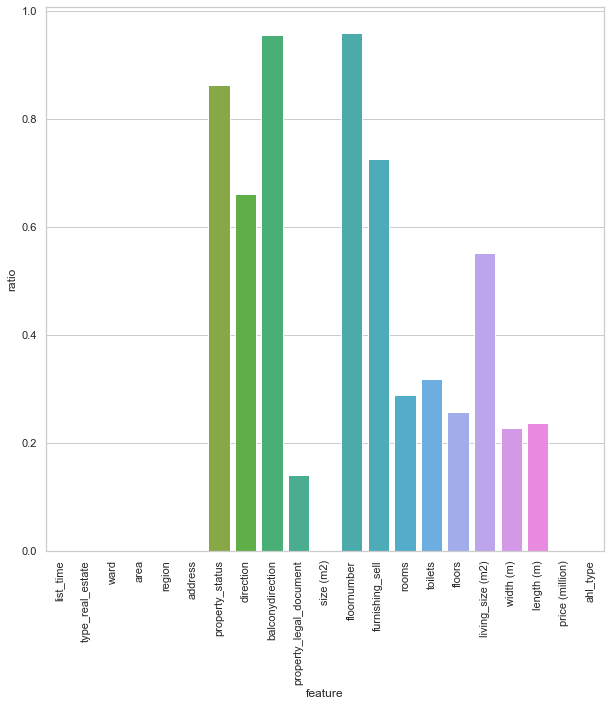

In [22]:
visualizing_missing_data(df)


In [23]:
df_cleaned = pd.read_csv('chotot_cleaned.csv')

In [24]:
df_cleaned.describe()

,size (m2),floornumber,living_size (m2),width (m),length (m),price (million)
count,9.525700e+04,3876.000000,42737.000000,73725.000000,72877.000000,9.540900e+04
mean,3.093060e+04,12.199690,166.610159,21.722333,41.086344,1.826762e+07
std,4.411510e+06,12.160109,1126.917752,1207.894713,898.128423,5.640653e+09
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000,3.700000e-01
25%,5.079000e+01,6.000000,64.000000,4.000000,12.000000,1.773000e+03
50%,7.200000e+01,10.000000,100.000000,5.000000,16.000000,3.450000e+03
75%,1.120000e+02,17.000000,180.000000,6.000000,22.000000,6.100000e+03
max,9.000000e+08,456.000000,123456.000000,315375.000000,135000.000000,1.742304e+12


In [25]:
df_cleaned['rooms'].unique()
df_cleaned['toilets'].unique()
df_cleaned['floors'].unique()
df_cleaned['floornumber'].unique()

array(['2', '1', '3', '4', '10', '8', '6', '9', '5', '7', 'Nhiều hơn 10',
       nan], dtype=object)

array(['2', '1', nan, '5', '3', 'Nhiều hơn 6', '4', '6'], dtype=object)

array(['Nhiều hơn 10', '1', '3', '2', '4', '5', '6', '7', '10', '9', '8',
       nan], dtype=object)

array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])